In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

print(df)

            Date  Hour  Discharge Rate (cumecs)  Rainfall Data (mm)  \
0     2021-04-01     1                    16.45                 0.0   
1     2021-04-01     2                    16.28                 0.0   
2     2021-04-01     3                    16.12                 0.0   
3     2021-04-01     4                    15.78                 0.0   
4     2021-04-01     5                    15.62                 0.0   
...          ...   ...                      ...                 ...   
2923  2022-05-31    20                   330.99                 1.3   
2924  2022-05-31    21                   327.96                 0.0   
2925  2022-05-31    22                   324.19                 0.0   
2926  2022-05-31    23                   321.94                 0.0   
2927  2022-05-31    24                   318.95                 0.0   

      Water Level (m)  
0                1.00  
1                0.99  
2                0.98  
3                0.96  
4                0.95  
...

Missing values in each column before processing:
Date                         0
Hour                         0
Discharge Rate (cumecs)     11
Rainfall Data (mm)         122
Water Level (m)             11
dtype: int64
Missing values in each column after processing:
Date                       0
Hour                       0
Discharge Rate (cumecs)    0
Rainfall Data (mm)         0
Water Level (m)            0
dtype: int64


C:\Users\Janith\AppData\Local\Temp\ipykernel_42268\615935172.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
55/55 - 5s - 83ms/step - loss: 6.6813 - mean_absolute_error: 2.0304 - val_loss: 4.3083 - val_mean_absolute_error: 1.6907
Epoch 2/100
55/55 - 0s - 3ms/step - loss: 2.2908 - mean_absolute_error: 1.1895 - val_loss: 0.5664 - val_mean_absolute_error: 0.6183
Epoch 3/100
55/55 - 0s - 3ms/step - loss: 0.4500 - mean_absolute_error: 0.4442 - val_loss: 0.1240 - val_mean_absolute_error: 0.2066
Epoch 4/100
55/55 - 0s - 3ms/step - loss: 0.3243 - mean_absolute_error: 0.3654 - val_loss: 0.0895 - val_mean_absolute_error: 0.1653
Epoch 5/100
55/55 - 0s - 3ms/step - loss: 0.2920 - mean_absolute_error: 0.3435 - val_loss: 0.0806 - val_mean_absolute_error: 0.1558
Epoch 6/100
55/55 - 0s - 3ms/step - loss: 0.2830 - mean_absolute_error: 0.3366 - val_loss: 0.0928 - val_mean_absolute_error: 0.1696
Epoch 7/100
55/55 - 0s - 3ms/step - loss: 0.2866 - mean_absolute_error: 0.3326 - val_loss: 0.0764 - val_mean_absolute_error: 0.1545
Epoch 8/100
55/55 - 0s - 3ms/step - loss: 0.2556 - mean_absolute_error: 0.3

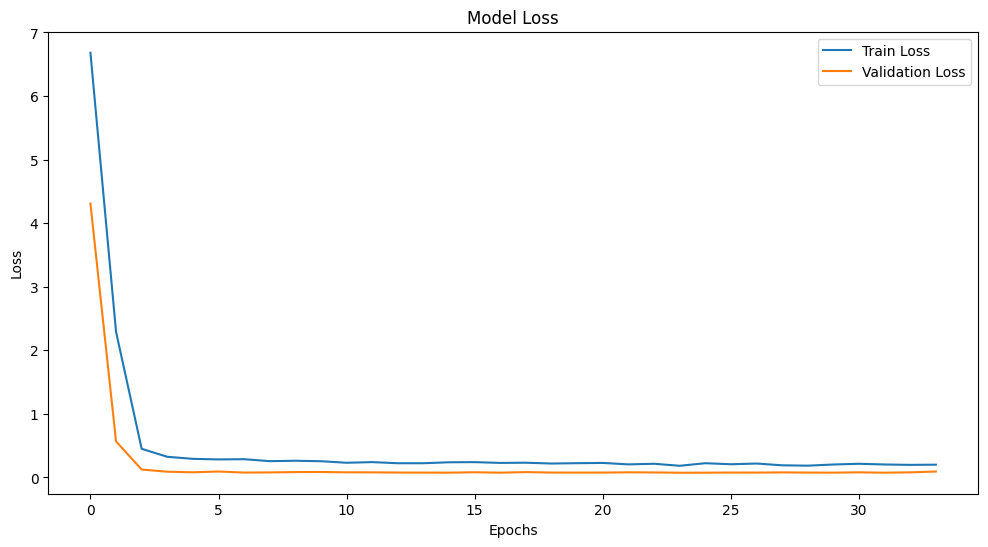

    Actual (Next 1st hour)  Predicted (Next 1st hour)  Actual (Next 2nd hour)  \
0                     4.10                   4.159000                    4.07   
1                     1.06                   1.087324                    1.04   
2                     3.02                   3.085423                    3.02   
3                     1.73                   1.658410                    1.78   
4                     2.63                   2.779853                    2.50   
5                     2.27                   2.307304                    2.18   
6                     2.30                   2.387198                    2.19   
7                     3.10                   2.993165                    3.27   
8                     2.58                   2.668610                    2.42   
9                     2.45                   1.964221                    2.55   
10                    0.68                   0.697155                    0.66   
11                    1.15  

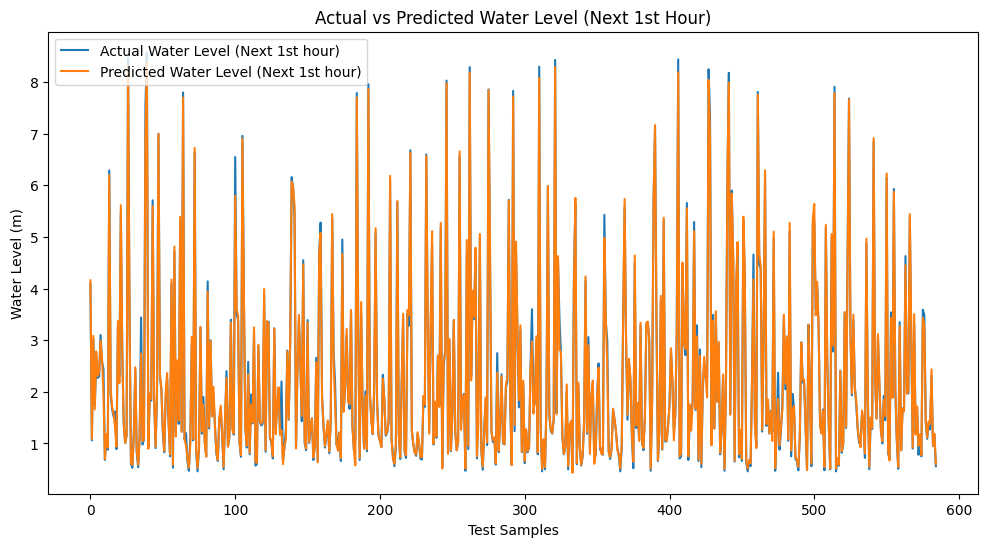

Mean Absolute Error for 1st hour prediction: 0.07821682640222404
Mean Absolute Error for 2nd hour prediction: 0.14446159356272117
Mean Absolute Error for 3rd hour prediction: 0.20983505909667055


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

# Check for null values
print("Missing values in each column before processing:")
print(df.isnull().sum())

# Method 1: Forward Fill (propagate last valid observation forward to fill nulls)
df.fillna(method='ffill', inplace=True)

# Method 2: Interpolation (optional, if you want to interpolate instead of forward fill)
# df.interpolate(method='linear', inplace=True)

# Method 3: Fill with column mean/median (optional if needed for specific columns)
# df['Rainfall Data (mm)'].fillna(df['Rainfall Data (mm)'].mean(), inplace=True)
# df['Discharge Rate (cumecs)'].fillna(df['Discharge Rate (cumecs)'].median(), inplace=True)

# Recheck for null values after filling
print("Missing values in each column after processing:")
print(df.isnull().sum())

# Extract input features and the target (Water Level)
X = df[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values

# Prepare target variables (Water Level for next 1st, 2nd, 3rd hours)
y = np.array([df['Water Level (m)'].shift(-i) for i in range(1, 4)]).T[:-3]

# Remove the last three rows since they don't have the target data
X = X[:-3]

# Split the data into train, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the input features (important for LSTM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to 3D for LSTM (samples, timesteps, features)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))  # Prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))  # 3 outputs: predict water level for next 3 hours

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), 
                    callbacks=[early_stop], verbose=2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Make predictions
y_pred = model.predict(X_test_scaled)

# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing actual vs predicted for first 20 values
comparison_df = pd.DataFrame({
    'Actual (Next 1st hour)': y_test[:, 0],
    'Predicted (Next 1st hour)': y_pred[:, 0],
    'Actual (Next 2nd hour)': y_test[:, 1],
    'Predicted (Next 2nd hour)': y_pred[:, 1],
    'Actual (Next 3rd hour)': y_test[:, 2],
    'Predicted (Next 3rd hour)': y_pred[:, 2]
})

print(comparison_df.head(20))

# Plot actual vs predicted water level (1st hour prediction)
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual Water Level (Next 1st hour)')
plt.plot(y_pred[:, 0], label='Predicted Water Level (Next 1st hour)')
plt.title('Actual vs Predicted Water Level (Next 1st Hour)')
plt.xlabel('Test Samples')
plt.ylabel('Water Level (m)')
plt.legend()
plt.show()

# Calculate and display MAE for each hour prediction
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f'Mean Absolute Error for 1st hour prediction: {mae_1st_hour}')
print(f'Mean Absolute Error for 2nd hour prediction: {mae_2nd_hour}')
print(f'Mean Absolute Error for 3rd hour prediction: {mae_3rd_hour}')


Method 2 for null

Epoch 1/1000


C:\Users\Janith\AppData\Local\Temp\ipykernel_42268\3566947730.py:16: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 - 4s - 70ms/step - loss: 7.2535 - mean_absolute_error: 2.0995 - val_loss: 5.2811 - val_mean_absolute_error: 1.8232
Epoch 2/1000
55/55 - 0s - 3ms/step - loss: 3.0119 - mean_absolute_error: 1.3135 - val_loss: 0.6578 - val_mean_absolute_error: 0.6522
Epoch 3/1000
55/55 - 0s - 3ms/step - loss: 0.5106 - mean_absolute_error: 0.4709 - val_loss: 0.1372 - val_mean_absolute_error: 0.2284
Epoch 4/1000
55/55 - 0s - 3ms/step - loss: 0.3065 - mean_absolute_error: 0.3644 - val_loss: 0.0972 - val_mean_absolute_error: 0.1690
Epoch 5/1000
55/55 - 0s - 3ms/step - loss: 0.2826 - mean_absolute_error: 0.3391 - val_loss: 0.0867 - val_mean_absolute_error: 0.1578
Epoch 6/1000
55/55 - 0s - 3ms/step - loss: 0.2794 - mean_absolute_error: 0.3314 - val_loss: 0.0768 - val_mean_absolute_error: 0.1519
Epoch 7/1000
55/55 - 0s - 3ms/step - loss: 0.2681 - mean_absolute_error: 0.3250 - val_loss: 0.0777 - val_mean_absolute_error: 0.1473
Epoch 8/1000
55/55 - 0s - 3ms/step - loss: 0.2620 - mean_absolute_error: 0.3203 -

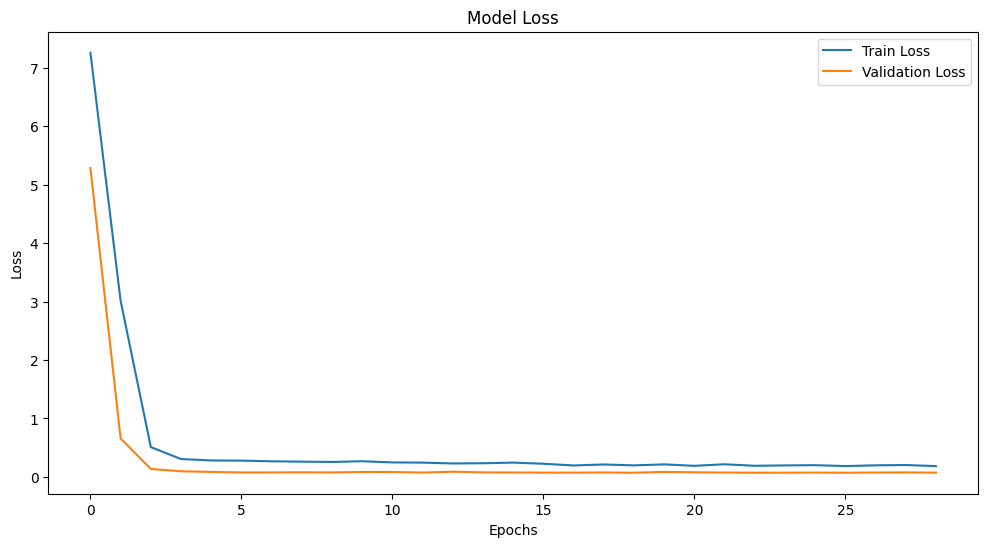

   Actual (Next 1st hour)  Predicted (Next 1st hour)  Actual (Next 2nd hour)  \
0                    4.10                   4.159622                    4.07   
1                    1.06                   1.068202                    1.04   
2                    3.02                   3.012355                    3.02   
3                    1.73                   1.617347                    1.78   
4                    2.63                   2.717370                    2.50   

   Predicted (Next 2nd hour)  Actual (Next 3rd hour)  \
0                   4.168859                    4.05   
1                   1.076384                    1.03   
2                   3.018025                    3.02   
3                   1.626252                    1.77   
4                   2.725485                    2.35   

   Predicted (Next 3rd hour)  
0                   4.198877  
1                   1.078581  
2                   3.008338  
3                   1.625022  
4                   2.71858

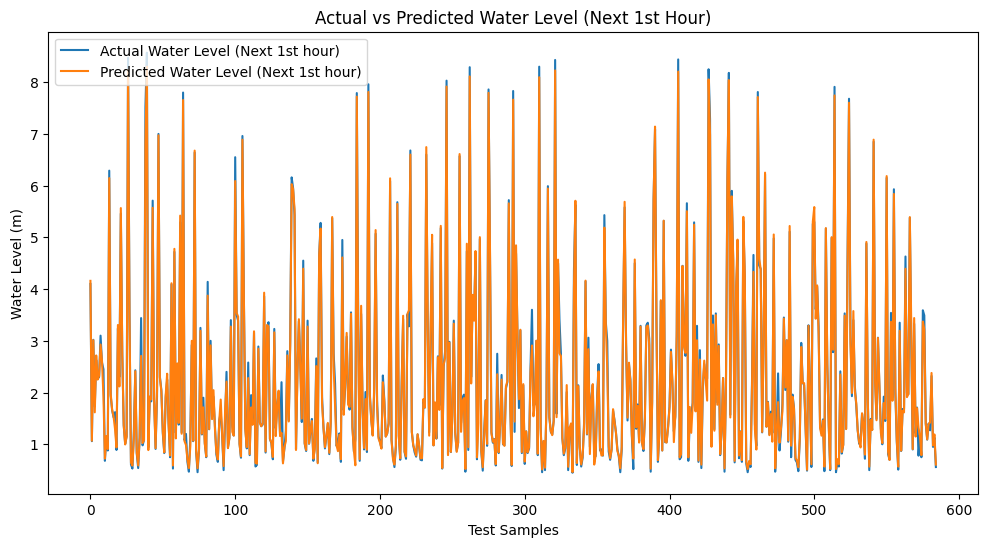

Mean Absolute Error for 1st hour prediction: 0.07769307752755972
Mean Absolute Error for 2nd hour prediction: 0.1423985559064099
Mean Absolute Error for 3rd hour prediction: 0.2065237984759176


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

# Method 2: Interpolation (optional, if you want to interpolate instead of forward fill)
df.interpolate(method='linear', inplace=True)

# Extract input features and the target (Water Level)
X = df[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values

# Prepare target variables (Water Level for next 1st, 2nd, 3rd hours)
y = np.array([df['Water Level (m)'].shift(-i) for i in range(1, 4)]).T[:-3]
X = X[:-3]  # Remove last three rows since we don't have the target data

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the input features (important for LSTM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape input data to 3D for LSTM (samples, timesteps, features)
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))  # Prevent overfitting
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))  # 3 outputs: predict water level for next 3 hours

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=32, validation_data=(X_val_scaled, y_val), 
                    callbacks=[early_stop], verbose=2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Make predictions
y_pred = model.predict(X_test_scaled)

# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing actual vs predicted for first 20 values
comparison_df = pd.DataFrame({
    'Actual (Next 1st hour)': y_test[:, 0],
    'Predicted (Next 1st hour)': y_pred[:, 0],
    'Actual (Next 2nd hour)': y_test[:, 1],
    'Predicted (Next 2nd hour)': y_pred[:, 1],
    'Actual (Next 3rd hour)': y_test[:, 2],
    'Predicted (Next 3rd hour)': y_pred[:, 2]
})

print(comparison_df.head(5))

# Plot actual vs predicted water level (1st hour prediction)
plt.figure(figsize=(12, 6))
plt.plot(y_test[:, 0], label='Actual Water Level (Next 1st hour)')
plt.plot(y_pred[:, 0], label='Predicted Water Level (Next 1st hour)')
plt.title('Actual vs Predicted Water Level (Next 1st Hour)')
plt.xlabel('Test Samples')
plt.ylabel('Water Level (m)')
plt.legend()
plt.show()

# Calculate and display MAE for each hour prediction
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f'Mean Absolute Error for 1st hour prediction: {mae_1st_hour}')
print(f'Mean Absolute Error for 2nd hour prediction: {mae_2nd_hour}')
print(f'Mean Absolute Error for 3rd hour prediction: {mae_3rd_hour}')


Missing values in each column before processing:
Date                         0
Hour                         0
Discharge Rate (cumecs)     11
Rainfall Data (mm)         122
Water Level (m)             11
dtype: int64
Missing values in each column after processing:
Date                       0
Hour                       0
Discharge Rate (cumecs)    0
Rainfall Data (mm)         0
Water Level (m)            0
dtype: int64
Epoch 1/100


C:\Users\Janith\AppData\Local\Temp\ipykernel_42268\2925292336.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


55/55 - 4s - 69ms/step - loss: 7.3410 - mean_absolute_error: 2.0798 - val_loss: 5.5402 - val_mean_absolute_error: 1.8069
Epoch 2/100
55/55 - 0s - 4ms/step - loss: 3.3181 - mean_absolute_error: 1.3292 - val_loss: 0.7075 - val_mean_absolute_error: 0.6339
Epoch 3/100
55/55 - 0s - 3ms/step - loss: 0.5370 - mean_absolute_error: 0.4827 - val_loss: 0.1285 - val_mean_absolute_error: 0.2280
Epoch 4/100
55/55 - 0s - 4ms/step - loss: 0.2961 - mean_absolute_error: 0.3532 - val_loss: 0.0924 - val_mean_absolute_error: 0.1749
Epoch 5/100
55/55 - 0s - 3ms/step - loss: 0.2695 - mean_absolute_error: 0.3304 - val_loss: 0.0846 - val_mean_absolute_error: 0.1666
Epoch 6/100
55/55 - 0s - 4ms/step - loss: 0.2745 - mean_absolute_error: 0.3287 - val_loss: 0.0831 - val_mean_absolute_error: 0.1580
Epoch 7/100
55/55 - 0s - 3ms/step - loss: 0.2617 - mean_absolute_error: 0.3251 - val_loss: 0.0831 - val_mean_absolute_error: 0.1547
Epoch 8/100
55/55 - 0s - 4ms/step - loss: 0.2342 - mean_absolute_error: 0.3108 - val_lo

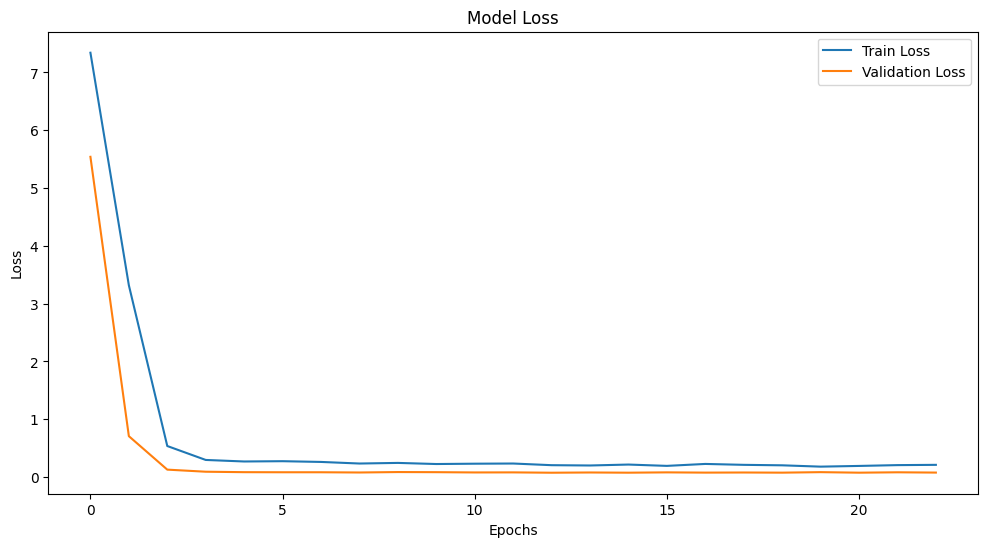

   Actual (Next 1st hour)  Predicted (Next 1st hour)  Actual (Next 2nd hour)  \
0                    4.10                   4.179354                    4.07   
1                    1.06                   1.061665                    1.04   
2                    3.02                   3.039050                    3.02   
3                    1.73                   1.631110                    1.78   
4                    2.63                   2.744235                    2.50   
5                    2.27                   2.271250                    2.18   
6                    2.30                   2.350822                    2.19   
7                    3.10                   2.959438                    3.27   
8                    2.58                   2.632400                    2.42   
9                    2.45                   1.931927                    2.55   

   Predicted (Next 2nd hour)  Actual (Next 3rd hour)  \
0                   4.198839                    4.05   
1      

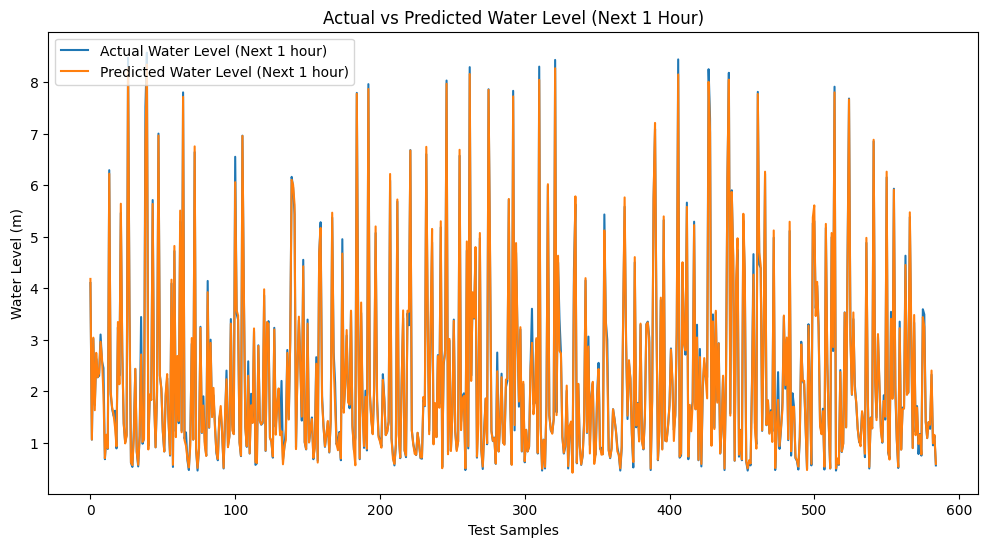

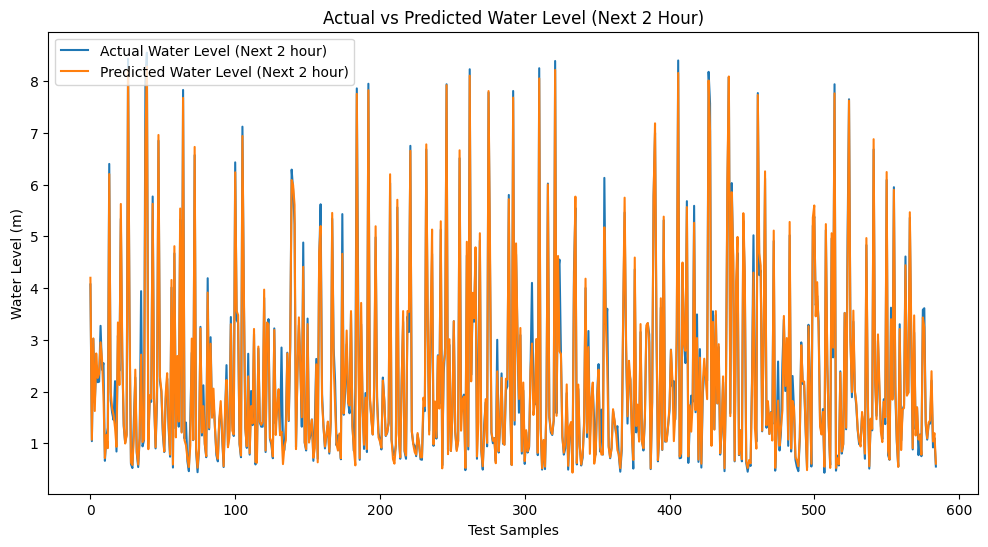

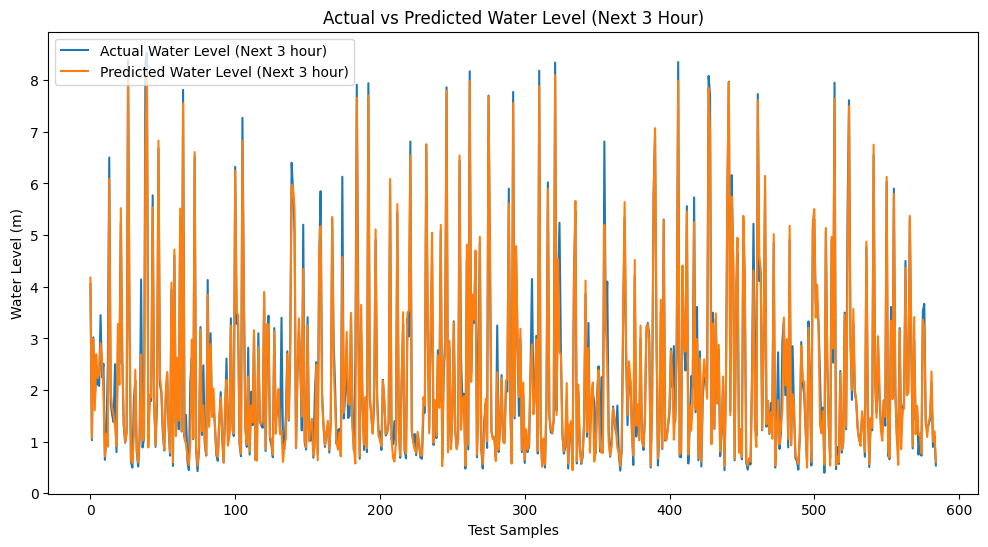

Mean Absolute Error for 1st hour prediction: 0.07421479889674065
Mean Absolute Error for 2nd hour prediction: 0.1409496042015206
Mean Absolute Error for 3rd hour prediction: 0.20133035714402156


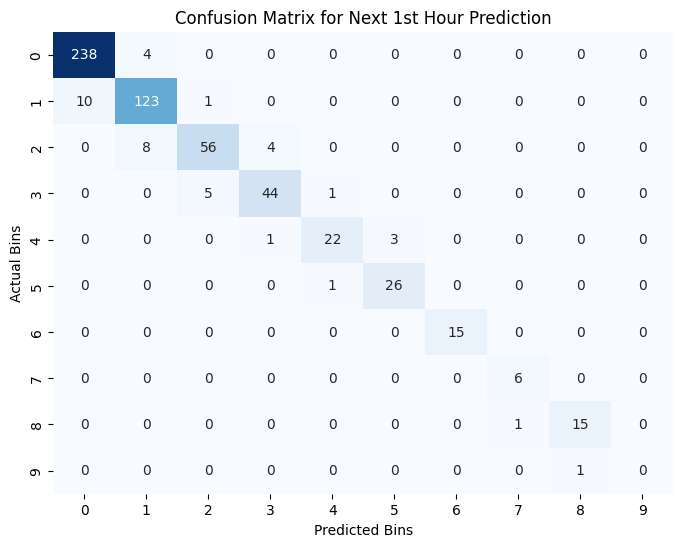

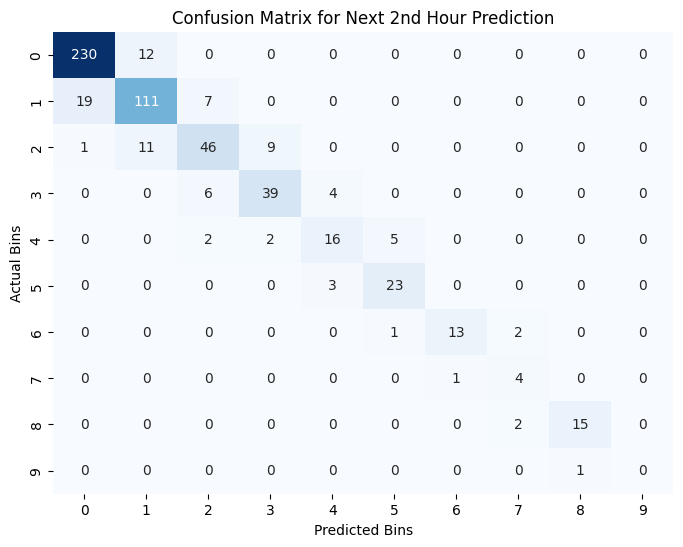

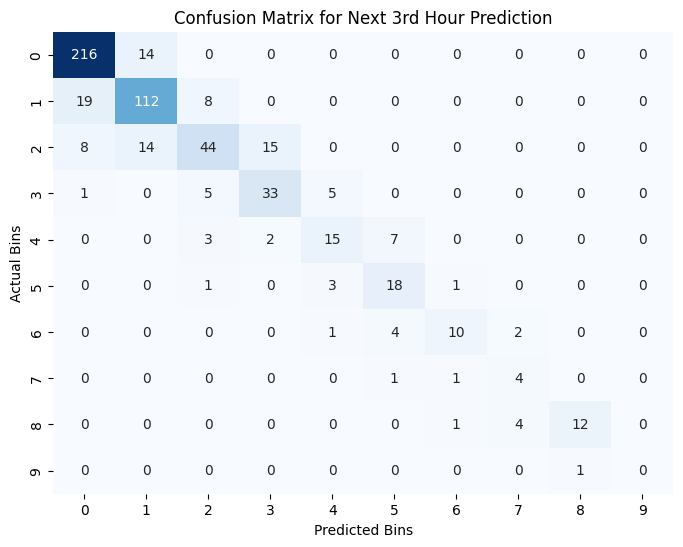

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns


# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

# Check for null values
print("Missing values in each column before processing:")
print(df.isnull().sum())

# Method 1: Forward Fill (propagate last valid observation forward to fill nulls)
df.fillna(method='ffill', inplace=True)

# Method 2: Interpolation (optional, if you want to interpolate instead of forward fill)
# df.interpolate(method='linear', inplace=True)

# Method 3: Fill with column mean/median (optional if needed for specific columns)
# df['Rainfall Data (mm)'].fillna(df['Rainfall Data (mm)'].mean(), inplace=True)
# df['Discharge Rate (cumecs)'].fillna(df['Discharge Rate (cumecs)'].median(), inplace=True)

# Recheck for null values after filling
print("Missing values in each column after processing:")
print(df.isnull().sum())

# Extract input features and target (Water Level for next 1st, 2nd, 3rd hours)
X = df[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values
y = np.array([df['Water Level (m)'].shift(-i) for i in range(1, 4)]).T[:-3]

# Remove the last three rows since they don't have the target data
X = X[:-3]

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=False, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))  # 3 outputs for 1st, 2nd, and 3rd hour predictions

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), 
                    callbacks=[early_stop], verbose=2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy for each hour's prediction
def calculate_accuracy(y_true, y_pred, threshold=0.1):
    """Calculate accuracy by checking if predicted values are within a threshold of actual values."""
    return np.mean(np.abs(y_true - y_pred) <= threshold)

accuracy_1st_hour = calculate_accuracy(y_test[:, 0], y_pred[:, 0])
accuracy_2nd_hour = calculate_accuracy(y_test[:, 1], y_pred[:, 1])
accuracy_3rd_hour = calculate_accuracy(y_test[:, 2], y_pred[:, 2])

print(f"Accuracy for 1st hour prediction: {accuracy_1st_hour * 100:.2f}%")
print(f"Accuracy for 2nd hour prediction: {accuracy_2nd_hour * 100:.2f}%")
print(f"Accuracy for 3rd hour prediction: {accuracy_3rd_hour * 100:.2f}%")

# Create confusion matrices for each hour's prediction
def create_confusion_matrix(y_true, y_pred, threshold=0.1):
    """Create confusion matrix based on whether predictions are within the threshold."""
    y_true_binary = (y_true > np.mean(y_true)).astype(int)
    y_pred_binary = (y_pred > np.mean(y_pred)).astype(int)
    return confusion_matrix(y_true_binary, y_pred_binary)

conf_matrix_1st_hour = create_confusion_matrix(y_test[:, 0], y_pred[:, 0])
conf_matrix_2nd_hour = create_confusion_matrix(y_test[:, 1], y_pred[:, 1])
conf_matrix_3rd_hour = create_confusion_matrix(y_test[:, 2], y_pred[:, 2])


# Plot loss and accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing actual vs predicted for first 10 values
comparison_df = pd.DataFrame({
    'Actual (Next 1st hour)': y_test[:, 0],
    'Predicted (Next 1st hour)': y_pred[:, 0],
    'Actual (Next 2nd hour)': y_test[:, 1],
    'Predicted (Next 2nd hour)': y_pred[:, 1],
    'Actual (Next 3rd hour)': y_test[:, 2],
    'Predicted (Next 3rd hour)': y_pred[:, 2]
})

print(comparison_df.head(10))


# Plot actual vs predicted for each of the next 3 hours
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, i], label=f'Actual Water Level (Next {i+1} hour)')
    plt.plot(y_pred[:, i], label=f'Predicted Water Level (Next {i+1} hour)')
    plt.title(f'Actual vs Predicted Water Level (Next {i+1} Hour)')
    plt.xlabel('Test Samples')
    plt.ylabel('Water Level (m)')
    plt.legend()
    plt.show()

# Calculate and display MAE for each hour prediction
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f'Mean Absolute Error for 1st hour prediction: {mae_1st_hour}')
print(f'Mean Absolute Error for 2nd hour prediction: {mae_2nd_hour}')
print(f'Mean Absolute Error for 3rd hour prediction: {mae_3rd_hour}')

# Create confusion matrices by binning the actual and predicted values into ranges
def create_binned_confusion_matrix(y_true, y_pred, hour):
    bins = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 10)  # Create 10 bins
    y_true_binned = np.digitize(y_true, bins)
    y_pred_binned = np.digitize(y_pred, bins)
    
    conf_matrix = confusion_matrix(y_true_binned, y_pred_binned)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Next {hour} Hour Prediction')
    plt.xlabel('Predicted Bins')
    plt.ylabel('Actual Bins')
    plt.show()

# Generate confusion matrices for next 1st, 2nd, and 3rd hour predictions
create_binned_confusion_matrix(y_test[:, 0], y_pred[:, 0], '1st')
create_binned_confusion_matrix(y_test[:, 1], y_pred[:, 1], '2nd')
create_binned_confusion_matrix(y_test[:, 2], y_pred[:, 2], '3rd')



C:\Users\Janith\AppData\Local\Temp\ipykernel_42268\1337489361.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
c:\Users\Janith\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
55/55 - 8s - 137ms/step - loss: 7.2076 - mean_absolute_error: 2.1023 - val_loss: 4.0868 - val_mean_absolute_error: 1.6670 - learning_rate: 0.0010
Epoch 2/100
55/55 - 0s - 5ms/step - loss: 1.5980 - mean_absolute_error: 0.9146 - val_loss: 0.1922 - val_mean_absolute_error: 0.2858 - learning_rate: 0.0010
Epoch 3/100
55/55 - 0s - 4ms/step - loss: 0.5113 - mean_absolute_error: 0.4584 - val_loss: 0.1096 - val_mean_absolute_error: 0.1882 - learning_rate: 0.0010
Epoch 4/100
55/55 - 0s - 5ms/step - loss: 0.3973 - mean_absolute_error: 0.4059 - val_loss: 0.0888 - val_mean_absolute_error: 0.1791 - learning_rate: 0.0010
Epoch 5/100
55/55 - 0s - 5ms/step - loss: 0.4391 - mean_absolute_error: 0.4178 - val_loss: 0.1430 - val_mean_absolute_error: 0.2296 - learning_rate: 0.0010
Epoch 6/100
55/55 - 0s - 4ms/step - loss: 0.3845 - mean_absolute_error: 0.3867 - val_loss: 0.0830 - val_mean_absolute_error: 0.1673 - learning_rate: 0.0010
Epoch 7/100
55/55 - 0s - 4ms/step - loss: 0.3631 - mean_absolu

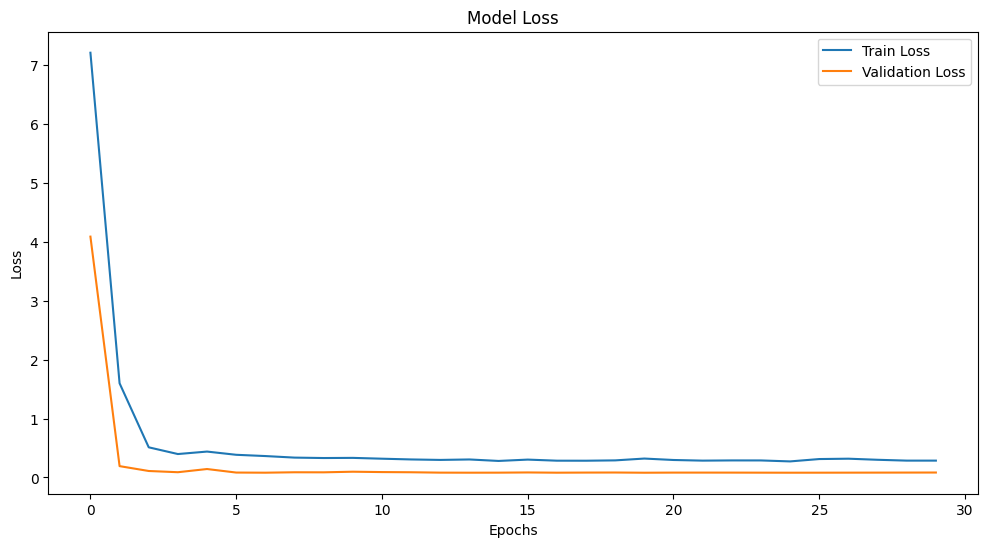

   Actual (Next 1st hour)  Predicted (Next 1st hour)  Actual (Next 2nd hour)  \
0                    4.10                       4.23                    4.07   
1                    1.06                       1.07                    1.04   
2                    3.02                       3.03                    3.02   
3                    1.73                       1.59                    1.78   
4                    2.63                       2.69                    2.50   
5                    2.27                       2.21                    2.18   
6                    2.30                       2.29                    2.19   
7                    3.10                       2.91                    3.27   
8                    2.58                       2.58                    2.42   
9                    2.45                       1.88                    2.55   

   Predicted (Next 2nd hour)  Actual (Next 3rd hour)  \
0                       4.25                    4.05   
1      

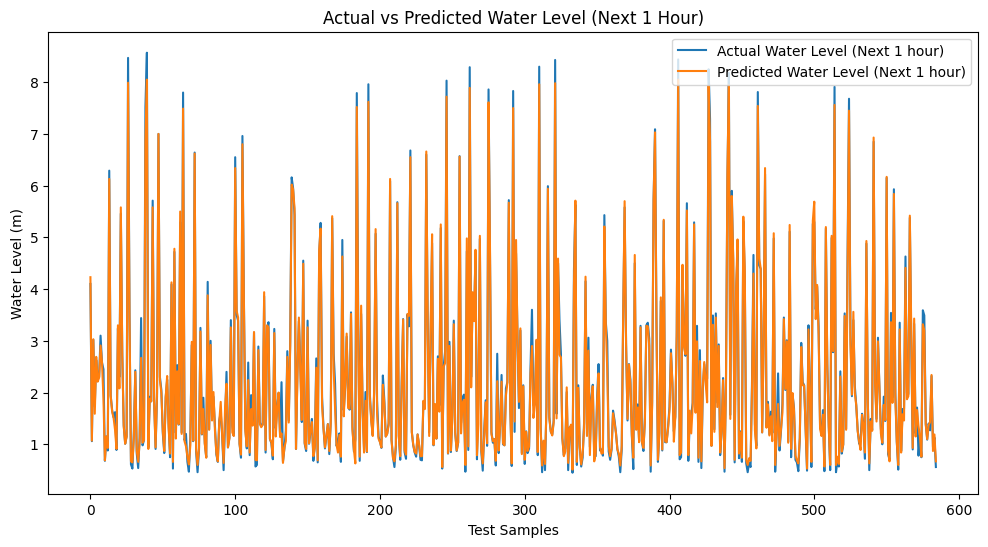

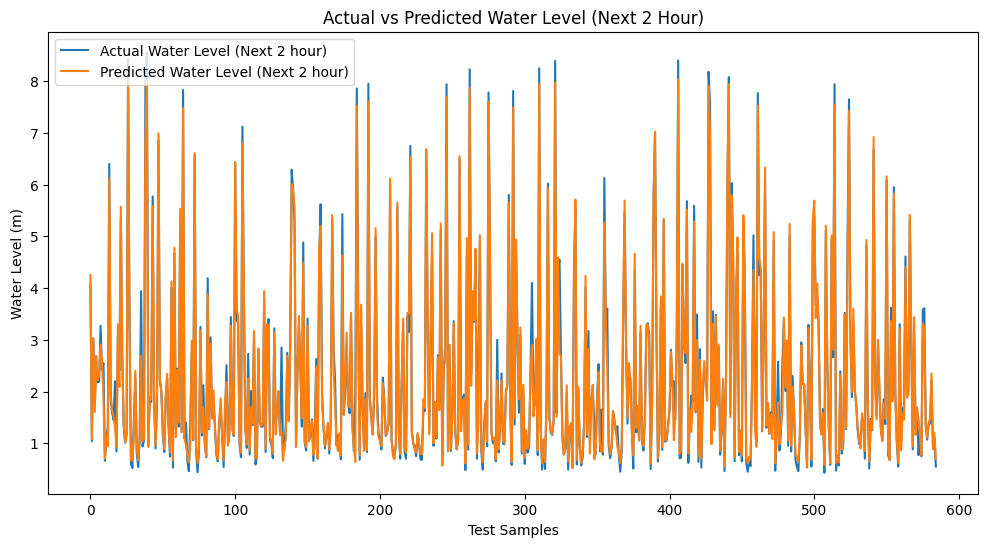

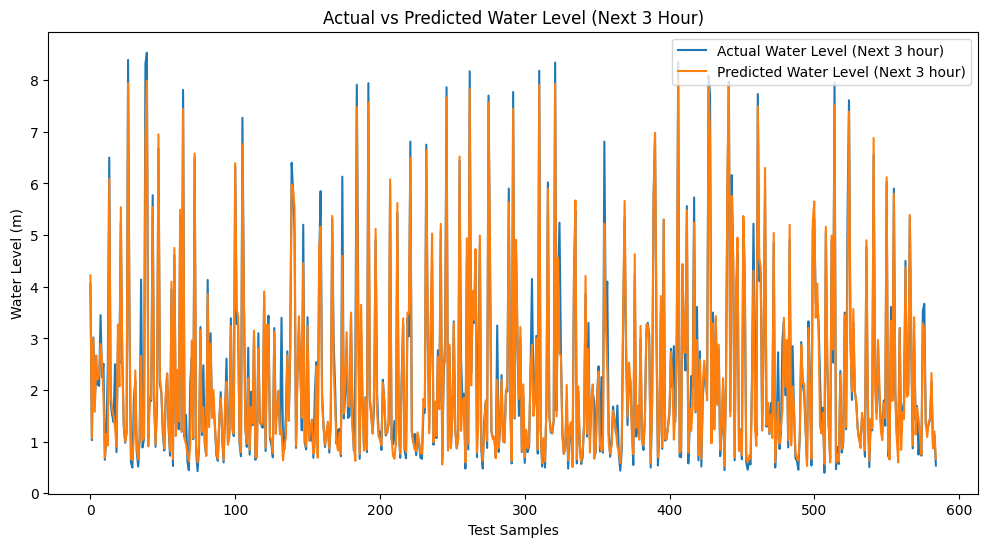

Mean Absolute Error for 1st hour prediction: 0.10
Mean Absolute Error for 2nd hour prediction: 0.15
Mean Absolute Error for 3rd hour prediction: 0.21


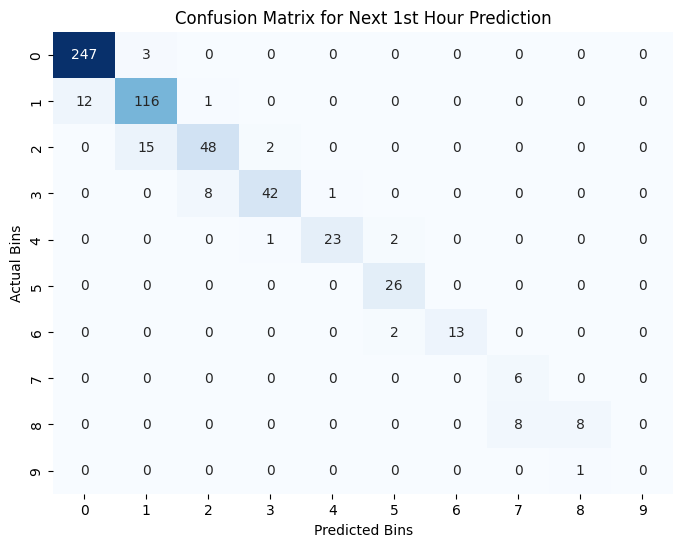

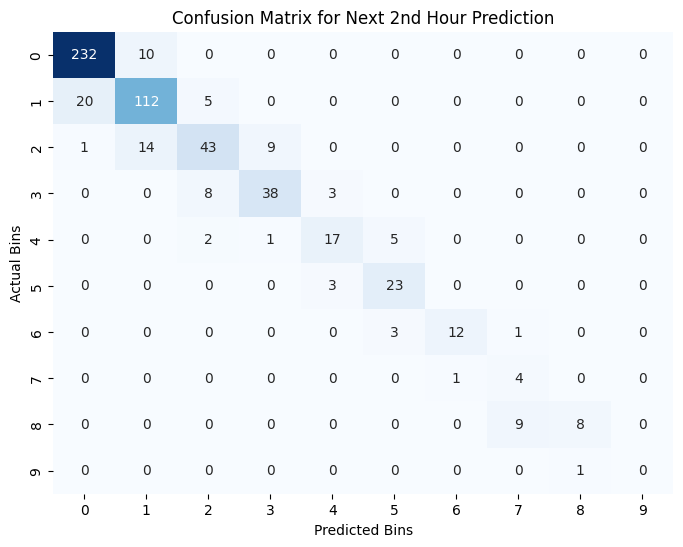

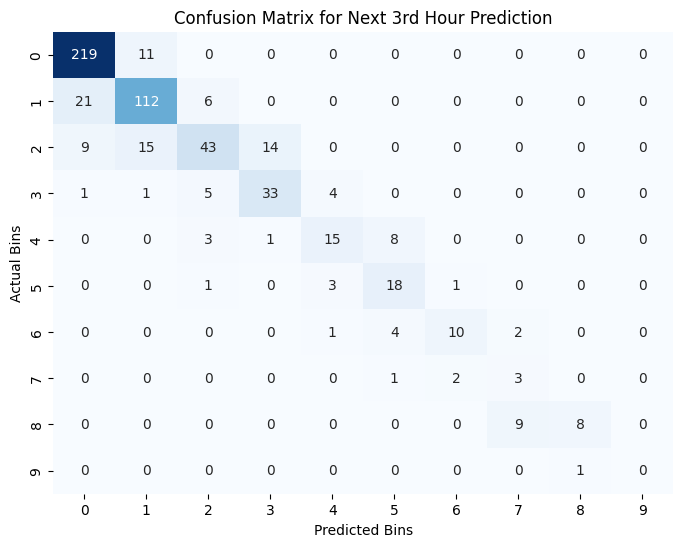

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import seaborn as sns

# Load the dataset
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

# Check for null values and forward fill
df.fillna(method='ffill', inplace=True)

# Extract input features and target (Water Level for next 1st, 2nd, 3rd hours)
X = df[['Discharge Rate (cumecs)', 'Rainfall Data (mm)', 'Water Level (m)']].values
y = np.array([df['Water Level (m)'].shift(-i) for i in range(1, 4)]).T[:-3]

# Remove the last three rows since they don't have the target data
X = X[:-3]

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape input data for LSTM
X_train_scaled = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_val_scaled = np.reshape(X_val_scaled, (X_val_scaled.shape[0], 1, X_val_scaled.shape[1]))
X_test_scaled = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build a deeper LSTM model
model = Sequential()

# First LSTM layer
model.add(LSTM(128, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
model.add(Dropout(0.3))

# Second LSTM layer
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))

# Dense layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer for the next 1, 2, and 3 hour predictions
model.add(Dense(3, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_val_scaled, y_val), 
                    callbacks=[early_stop, reduce_lr], verbose=2)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Round the predictions to two decimal places
y_pred = np.round(y_pred, 2)

# Calculate accuracy for each hour's prediction
def calculate_accuracy(y_true, y_pred, threshold=0.1):
    return np.mean(np.abs(y_true - y_pred) <= threshold)

accuracy_1st_hour = calculate_accuracy(y_test[:, 0], y_pred[:, 0])
accuracy_2nd_hour = calculate_accuracy(y_test[:, 1], y_pred[:, 1])
accuracy_3rd_hour = calculate_accuracy(y_test[:, 2], y_pred[:, 2])

print(f"Accuracy for 1st hour prediction: {accuracy_1st_hour * 100:.2f}%")
print(f"Accuracy for 2nd hour prediction: {accuracy_2nd_hour * 100:.2f}%")
print(f"Accuracy for 3rd hour prediction: {accuracy_3rd_hour * 100:.2f}%")

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Comparing actual vs predicted for first 10 values
comparison_df = pd.DataFrame({
    'Actual (Next 1st hour)': y_test[:, 0],
    'Predicted (Next 1st hour)': y_pred[:, 0],
    'Actual (Next 2nd hour)': y_test[:, 1],
    'Predicted (Next 2nd hour)': y_pred[:, 1],
    'Actual (Next 3rd hour)': y_test[:, 2],
    'Predicted (Next 3rd hour)': y_pred[:, 2]
})

print(comparison_df.head(10))

# Plot actual vs predicted for each of the next 3 hours
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.plot(y_test[:, i], label=f'Actual Water Level (Next {i+1} hour)')
    plt.plot(y_pred[:, i], label=f'Predicted Water Level (Next {i+1} hour)')
    plt.title(f'Actual vs Predicted Water Level (Next {i+1} Hour)')
    plt.xlabel('Test Samples')
    plt.ylabel('Water Level (m)')
    plt.legend()
    plt.show()

# Calculate and display MAE for each hour prediction
mae_1st_hour = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
mae_2nd_hour = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
mae_3rd_hour = mean_absolute_error(y_test[:, 2], y_pred[:, 2])

print(f'Mean Absolute Error for 1st hour prediction: {mae_1st_hour:.2f}')
print(f'Mean Absolute Error for 2nd hour prediction: {mae_2nd_hour:.2f}')
print(f'Mean Absolute Error for 3rd hour prediction: {mae_3rd_hour:.2f}')

# Create confusion matrices by binning the actual and predicted values into ranges
def create_binned_confusion_matrix(y_true, y_pred, hour):
    bins = np.linspace(min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max()), 10)
    y_true_binned = np.digitize(y_true, bins)
    y_pred_binned = np.digitize(y_pred, bins)
    
    conf_matrix = confusion_matrix(y_true_binned, y_pred_binned)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for Next {hour} Hour Prediction')
    plt.xlabel('Predicted Bins')
    plt.ylabel('Actual Bins')
    plt.show()

# Generate confusion matrices for next 1st, 2nd, and 3rd hour predictions
create_binned_confusion_matrix(y_test[:, 0], y_pred[:, 0], '1st')
create_binned_confusion_matrix(y_test[:, 1], y_pred[:, 1], '2nd')
create_binned_confusion_matrix(y_test[:, 2], y_pred[:, 2], '3rd')
